In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
#读取数据
PSNR_name=["bonus_resblock_32conv_noupdown_100epoch_withcascade_3times_PSNR.pth",
           "bonus_resblock_32conv_noupdown_100epoch_withcascade_2times_PSNR.pth",
           "bonus_resblock_32conv_noupdown_100epoch_withcascade_1times_PSNR.pth",
           "resblock_32conv_noupdown_100epoch_PSNR.pth"]
SSIM_name=["bonus_resblock_32conv_noupdown_100epoch_withcascade_3times_SSIM.pth",
           "bonus_resblock_32conv_noupdown_100epoch_withcascade_2times_SSIM.pth",
            "bonus_resblock_32conv_noupdown_100epoch_withcascade_1times_SSIM.pth",
              "resblock_32conv_noupdown_100epoch_SSIM.pth"]
#读进list
PSNR_list=[]
SSIM_list=[]
for name in PSNR_name:
    PSNR_list.append(torch.load(name))
for name in SSIM_name:
    SSIM_list.append(torch.load(name))

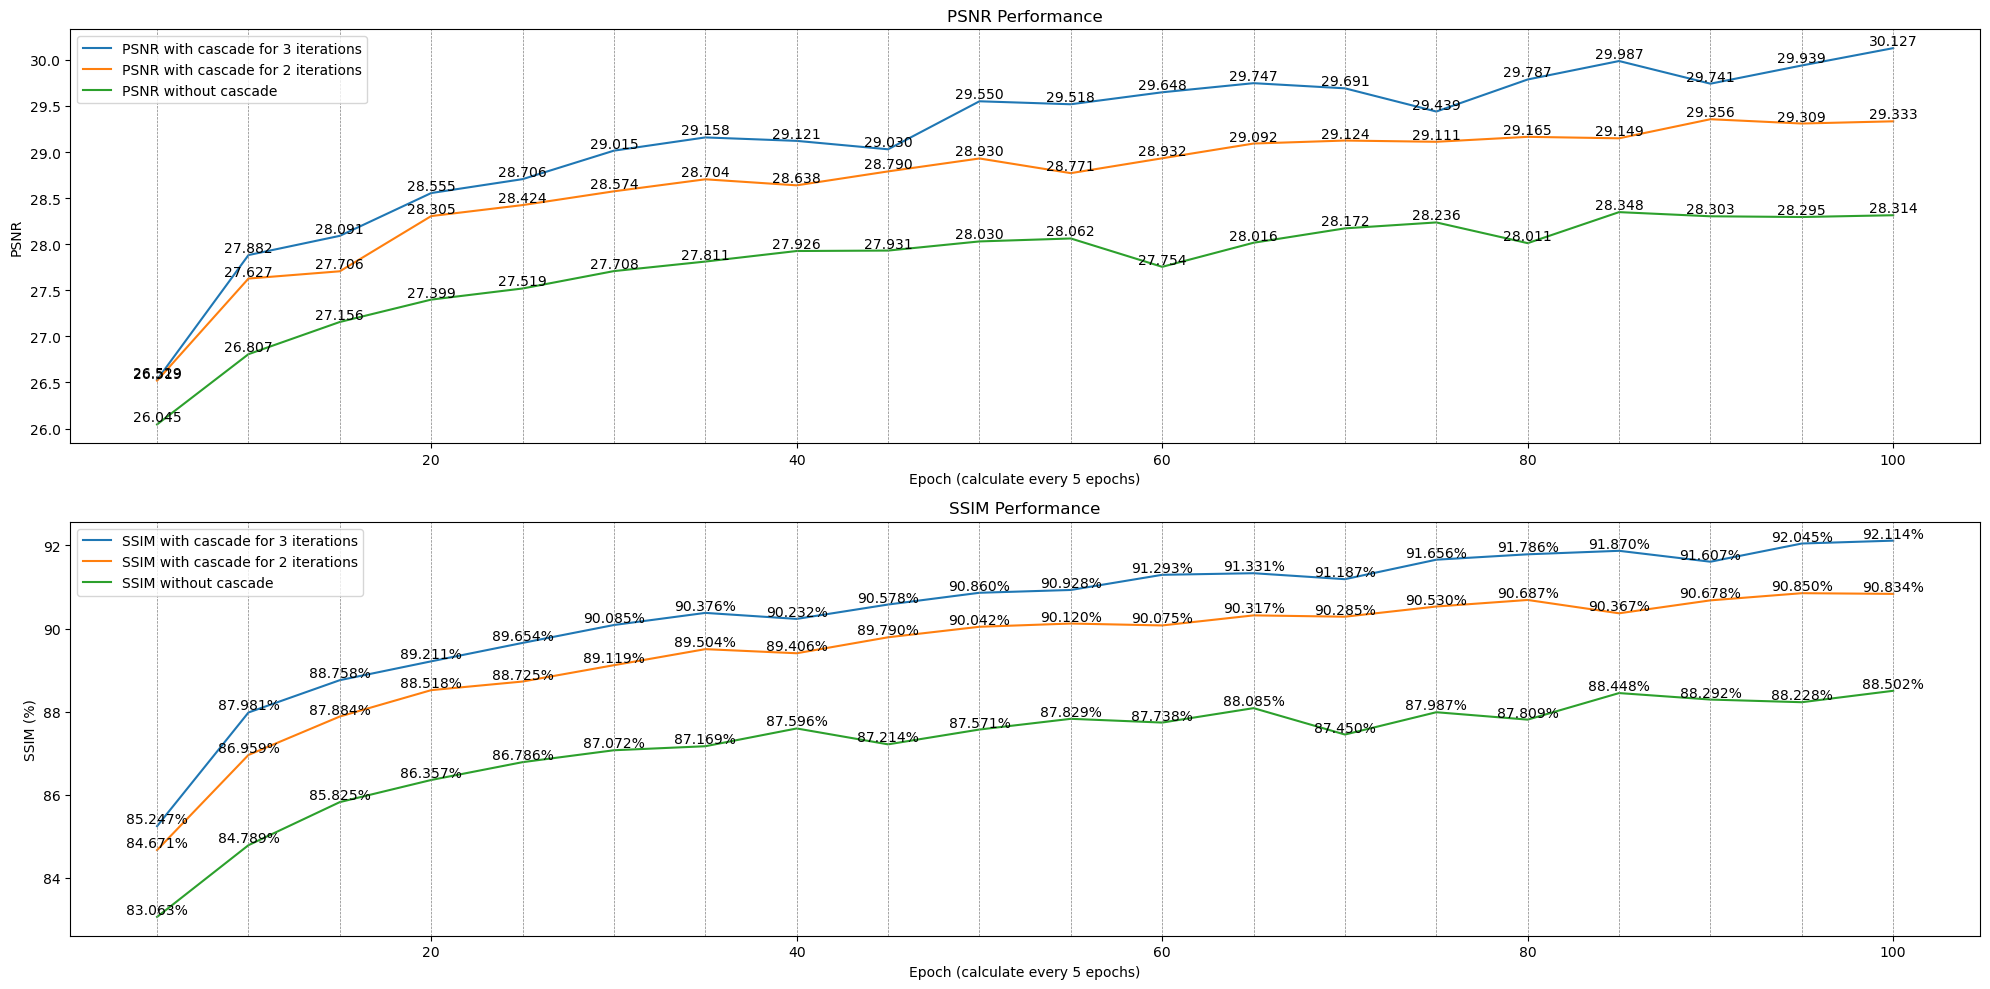

In [4]:
import matplotlib.pyplot as plt

# 假设PSNR_list 和 SSIM_list 的长度相同
length_of_data = len(PSNR_list[0])

# 生成横坐标列表，每个点是5的倍数
x_ticks = [5 * (i+1) for i in range(length_of_data)]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

# PSNR 图表
ax1.plot(x_ticks, PSNR_list[0], label="PSNR with cascade for 3 iterations")
ax1.plot(x_ticks, PSNR_list[1], label="PSNR with cascade for 2 iterations")
ax1.plot(x_ticks, PSNR_list[2], label="PSNR with cascade for 1 iteration")
ax1.plot(x_ticks, PSNR_list[3], label="PSNR without cascade")
# 在每个点上显示数值
for i in range(length_of_data):
    ax1.text(x_ticks[i], PSNR_list[0][i], f'{PSNR_list[0][i]:.3f}', ha='center', va='bottom')
    ax1.text(x_ticks[i], PSNR_list[1][i], f'{PSNR_list[1][i]:.3f}', ha='center', va='bottom')
    ax1.text(x_ticks[i], PSNR_list[2][i], f'{PSNR_list[2][i]:.3f}', ha='center', va='bottom')
    ax1.text(x_ticks[i], PSNR_list[3][i], f'{PSNR_list[3][i]:.3f}', ha='center', va='bottom')
ax1.set(xlabel='Epoch (calculate every 5 epochs)', ylabel='PSNR', title='PSNR Performance')
ax1.legend()
for i in range(1, length_of_data+1):
    ax1.axvline(x=5*i, color='gray', linestyle='--', linewidth=0.5)

# SSIM 图表
ax2.plot(x_ticks, [ssim*100 for ssim in SSIM_list[0]], label="SSIM with cascade for 3 iterations")
ax2.plot(x_ticks, [ssim*100 for ssim in SSIM_list[1]], label="SSIM with cascade for 2 iterations")
ax2.plot(x_ticks, [ssim*100 for ssim in SSIM_list[2]], label="SSIM with cascade for 1 iteration")
ax2.plot(x_ticks, [ssim*100 for ssim in SSIM_list[3]], label="SSIM without cascade")
# 在每个点上显示数值
for i in range(length_of_data):
    ax2.text(x_ticks[i], SSIM_list[0][i]*100, f'{SSIM_list[0][i]*100:.3f}%', ha='center', va='bottom')
    ax2.text(x_ticks[i], SSIM_list[1][i]*100, f'{SSIM_list[1][i]*100:.3f}%', ha='center', va='bottom')
    ax2.text(x_ticks[i], SSIM_list[2][i]*100, f'{SSIM_list[2][i]*100:.3f}%', ha='center', va='bottom')
    ax2.text(x_ticks[i], SSIM_list[3][i]*100, f'{SSIM_list[3][i]*100:.3f}%', ha='center', va='bottom')
ax2.set(xlabel='Epoch (calculate every 5 epochs)', ylabel='SSIM (%)', title='SSIM Performance')
ax2.legend()
for i in range(1, length_of_data+1):
    ax2.axvline(x=5*i, color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


In [3]:
namelist=["bonus_resblock_32conv_noupdown_100epoch_withcascade_0times_new",
          "bonus_resblock_32conv_noupdown_100epoch_withcascade_2times_new",
          "bonus_resblock_32conv_noupdown_100epoch_withcascade_3times_new"]
PSNR_list=[]
SSIM_list=[]
loss_train_list=[]
loss_val_list=[]
for str in namelist:
    PSNR_name=[f".\\data\\problem5\\{str}_PSNR.pth"]#shape:n
    SSIM_name=[f".\\data\\problem5\\{str}_SSIM.pth"]#shape:n
    loss_train_name=[f".\\data\\problem5\\{str}_loss_train.pth"]#shape:n
    loss_val_name=[f".\\data\\problem5\\{str}_loss_val.pth"]#shape:n
    for name in PSNR_name:
        PSNR_list.append(torch.load(name))
    for name in SSIM_name:
        SSIM_list.append(torch.load(name))
    for name in loss_train_name:
        loss_train_list.append(torch.load(name))
    for name in loss_val_name:
        loss_val_list.append(torch.load(name))

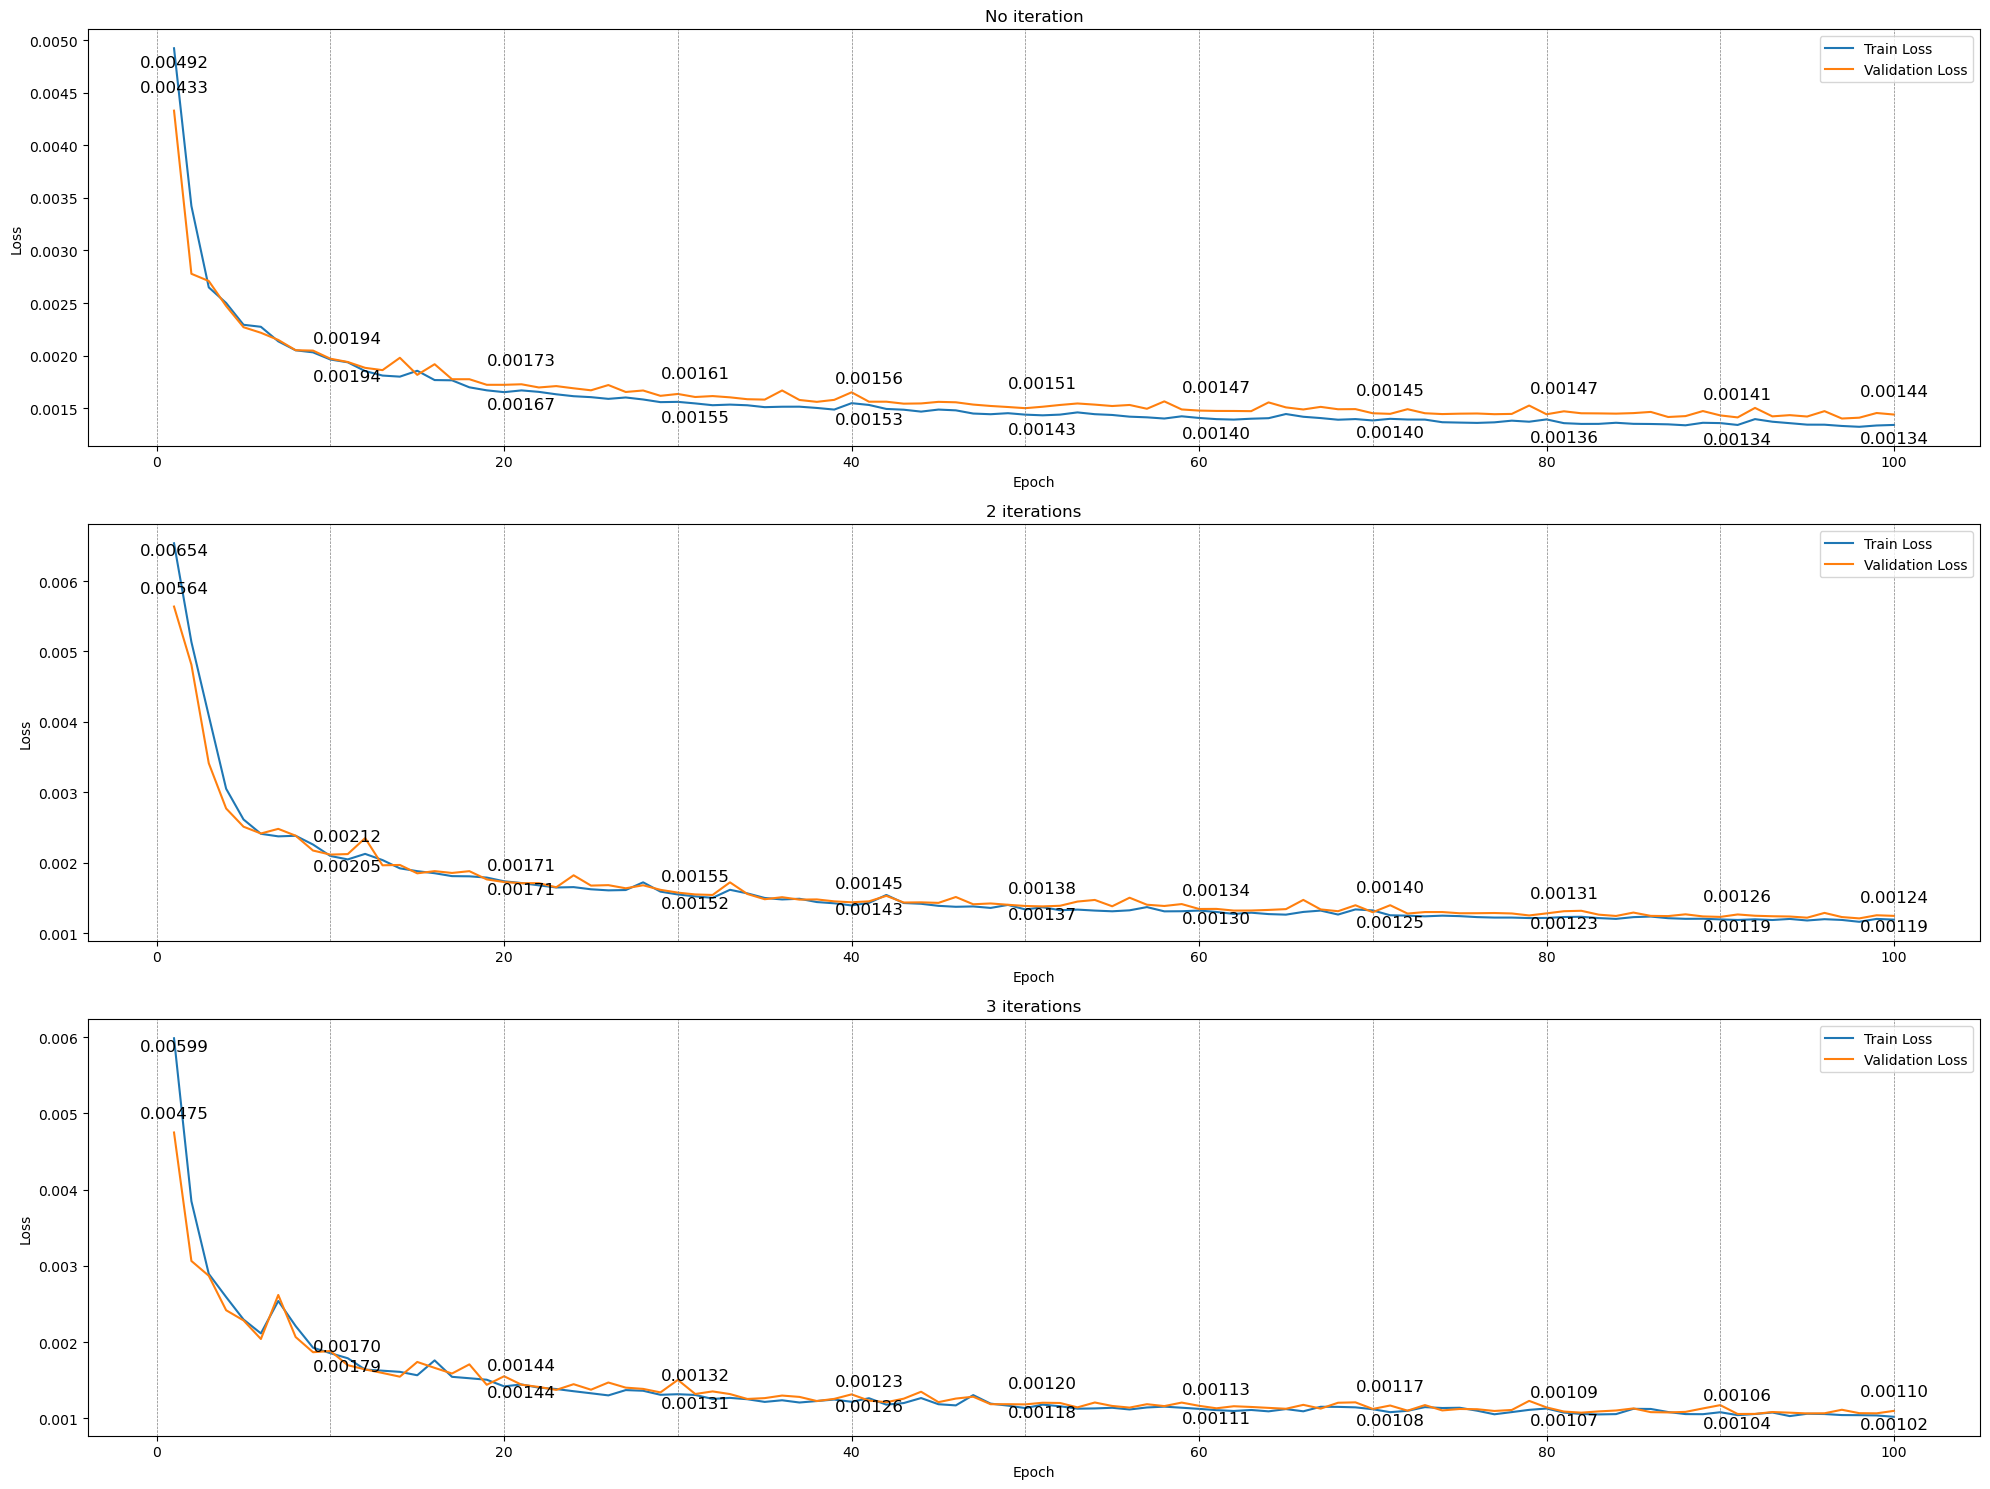

In [11]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15))

# 给每个子图绘制训练损失和验证损失
for i, ax in enumerate(axes):
    x_ticks = range(1, len(loss_train_list[i]) + 1)
    
    # 绘制训练损失和验证损失
    ax.plot(x_ticks, loss_train_list[i], label='Train Loss')
    ax.plot(x_ticks, loss_val_list[i], label='Validation Loss')
    
    # 每50个epoch画一条虚线
    for j in range(1, len(loss_train_list[i]) + 2, 10):
        ax.axvline(x=j-1, color='gray', linestyle='--', linewidth=0.5)
    
    # 显示数据
    for k in range(0, len(loss_train_list[i])):
        if (k) % 10 == 0 or k == len(loss_train_list[i]) - 1 or k == 0:
            ax.text(x_ticks[k], loss_train_list[i][k]-0.000205, f'{loss_train_list[i][k]:.5f}', ha='center', va='bottom', fontsize=12)
            ax.text(x_ticks[k], loss_val_list[i][k]+0.00015, f'{loss_val_list[i][k]:.5f}', ha='center', va='bottom', fontsize=12)
    
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title(f'Model {i+1}')
    ax.legend()
axes[0].set_title('No iteration')
axes[1].set_title('2 iterations')
axes[2].set_title('3 iterations')
plt.tight_layout()
plt.show()


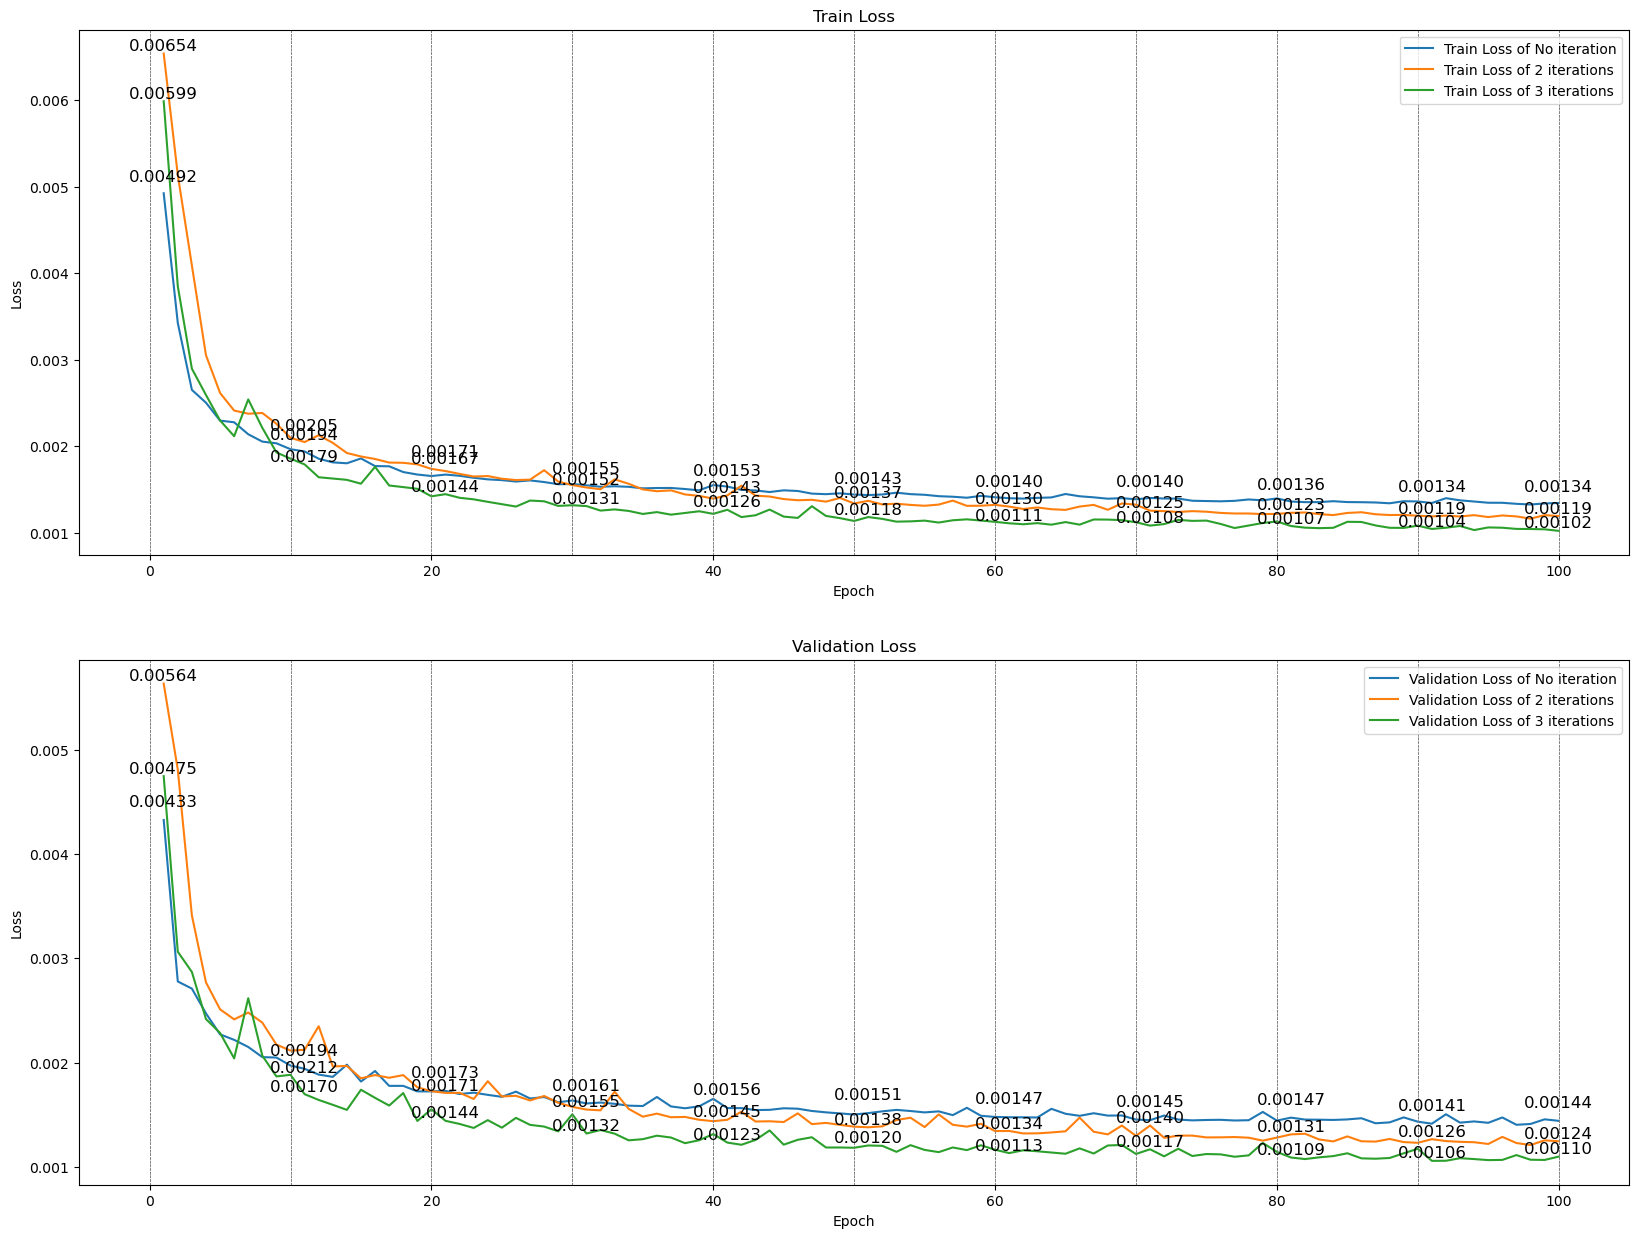

In [83]:
#画两幅图分别是train loss和validation loss
model_name=["No iteration","2 iterations","3 iterations"]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
for i in range(len(namelist)):
    x_ticks = range(1, len(loss_train_list[i]) + 1)
    axes[0].plot(x_ticks, loss_train_list[i], label=f'Train Loss of {model_name[i]}')
    axes[1].plot(x_ticks, loss_val_list[i], label=f'Validation Loss of {model_name[i]}')
    for j in range(1, len(loss_train_list[i]) + 2, 10):
        axes[0].axvline(x=j-1, color='gray', linestyle='--', linewidth=0.5)
        axes[1].axvline(x=j-1, color='gray', linestyle='--', linewidth=0.5)
    for k in range(0, len(loss_train_list[i])):
        #为了让数据显示的更好看，对一些数据显示的位置进行了微调，但是不改变数据本身
        if (k) % 10 == 0 or k == len(loss_train_list[i]) - 1 or k == 0:
            offset1=0
            offset2=0
            if i==1 and k==10:
                offset1=0.0001031
                offset2=-0.000241
            elif i==1 and k==20:
                offset1=0.000131
                
            elif i==0:
                offset1=0.00010
                offset2=0.0001
            axes[0].text(x_ticks[k], loss_train_list[i][k]+offset1, f'{loss_train_list[i][k]:.5f}', ha='center', va='bottom', fontsize=12)
            axes[1].text(x_ticks[k], loss_val_list[i][k]+offset2, f'{loss_val_list[i][k]:.5f}', ha='center', va='bottom', fontsize=12)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Train Loss')
    axes[0].legend(loc='upper right')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].set_title('Validation Loss')
    axes[1].legend(loc='upper right')